## Praca domowa 7
### Wstęp do uczenia maszynowego
### Paweł Morgen

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Wczytanie obrazka oraz przekształcenie do 2D
Zgodnie ze wskazówką z treści zadania, przekształcamy surową 3-wymiarową tablicę do 2-wymiarowej macierzy, łącząc wymiar szerokości obrazka i wymiar kanału.

In [18]:
arr = mpimg.imread('xp.png')
print("Original shape:", arr.shape)
nrow = arr.shape[0]
arr_2d = arr.reshape(nrow,-1)
print("New shape: ", arr_2d.shape)

Original shape: (1080, 1920, 3)
New shape:  (1080, 5760)


### Zastosowanie PCA
Stosujemy algorytm PCA tak, by powstałe zmienne *wyjaśniały* **95%** wariancji.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, svd_solver = 'full')
arr_PCAd = pca.fit_transform(arr_2d)
arr_PCAd.shape

(1080, 8)

### Komentarz
Dzięki algorytmowi PCA obrazek został skompresowany pomyślnie. Skompresowany obrazek zajmuje około **720 razy mniej** pamięci niż obrazek przed kompresją. Oczywiście, odbywa się to kosztem jakości obrazka (95% to nie 100%).

Zobaczmy jeszcze, jaki jest związek między tresholdem wariancji a ilością kolumn w zwracanej macierzy.

In [35]:
max_k = 20
results = [None] * (max_k - 1)
for k in range(2, max_k + 1):
    pca = PCA(n_components = k)
    arr_PCAd = pca.fit(arr_2d)
    results[k - 2] = np.sum(pca.explained_variance_ratio_)

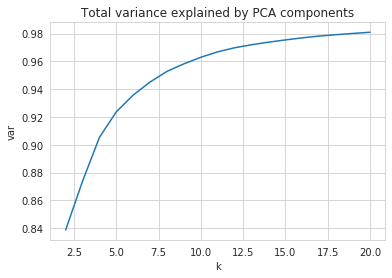

In [74]:
sns.set_style('whitegrid')
to_plot = pd.DataFrame({'k' : range(2, max_k + 1),
                       'var' : results})
sns.lineplot(data = to_plot,
            x = 'k',
            y = 'var')
plt.title('Total variance explained by PCA components')
plt.show()

## Zadanie dodatkowe

In [42]:
df = pd.read_table('signals.tsv', )
df.describe()

,time,signal1,signal2,signal3,signal4
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.170087,0.045499,-0.004192,0.141892
std,2886.89568,1.000050,1.000050,1.000050,1.000050
min,0.00000,-2.550636,-1.682129,-2.498578,-3.123449
25%,2499.75000,-0.722841,-0.970122,-0.825474,-0.452535
50%,4999.50000,0.325646,0.651934,-0.004253,0.074214
75%,7499.25000,1.033723,0.989656,0.821165,0.622326
max,9999.00000,2.459848,1.711846,2.568499,4.281804


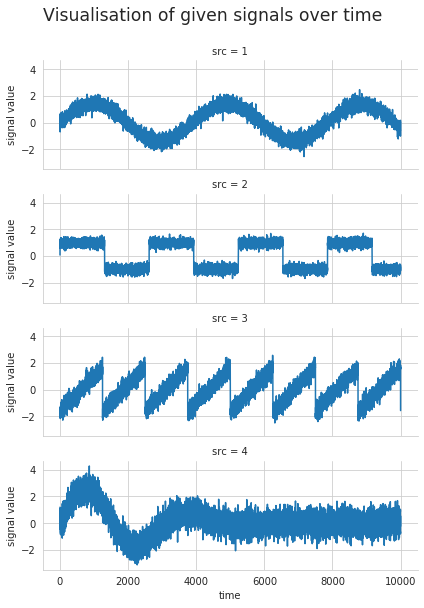

In [77]:
df_to_plot = pd.wide_to_long(df.assign(i = df.index), 'signal', i = "i", j = 'src').reset_index(level = 'src').reset_index(drop = True)
sns.set_style('whitegrid')
ax = sns.relplot(x = 'time', y = 'signal', data = df_to_plot, row = 'src', kind = 'line', aspect = 3, height = 2)
ax.set(ylabel = 'signal value')
ax.fig.suptitle('Visualisation of given signals over time', y = 1.05, fontsize = 'xx-large')
plt.show()

In [63]:
from sklearn.decomposition import FastICA
arr = df.iloc[:,1:5].to_numpy()
ica = FastICA(n_components=4)
new_arr = ica.fit_transform(arr)
new_df = pd.DataFrame(new_arr, columns = ['orig_signal1',
                                         'orig_signal2',
                                         'orig_signal3',
                                         'orig_signal4']).assign(time = df.loc[:,'time'])
new_df.describe()

,orig_signal1,orig_signal2,orig_signal3,orig_signal4,time
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,-2.664535e-19,-1.776357e-19,0.000000,0.000000,4999.50000
std,1.000050e-02,1.000050e-02,0.010001,0.010001,2886.89568
min,-2.500597e-02,-3.026256e-02,-0.017232,-0.022763,0.00000
25%,-8.130444e-03,-7.452698e-03,-0.009427,-0.008661,2499.75000
50%,-1.160958e-06,-9.704927e-05,-0.005970,-0.001370,4999.50000
75%,8.103076e-03,7.184745e-03,0.010196,0.009246,7499.25000
max,2.607447e-02,3.527275e-02,0.017635,0.025011,9999.00000


In [62]:
ica.components_

array([[ 9.08766641e-03, -1.34096507e-03, -1.02537643e-03,
         2.26097357e-03],
       [-5.31447709e-03, -3.47145709e-03, -6.74280282e-04,
         1.08553336e-02],
       [ 8.35632632e-04,  1.13235581e-04,  9.94198587e-03,
         6.15635838e-04],
       [ 3.79923733e-04, -9.89151565e-03, -9.58043008e-05,
        -4.19227595e-04]])

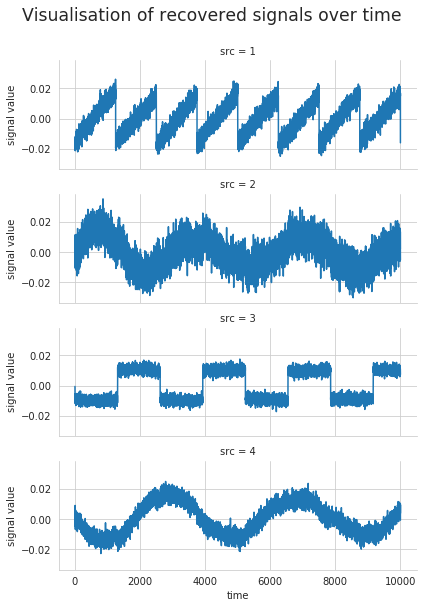

In [78]:
df_to_plot = pd.wide_to_long(new_df.assign(i = df.index), 'orig_signal', i = "i", j = 'src').reset_index(level = 'src').reset_index(drop = True)
ax = sns.relplot(x = 'time', y = 'orig_signal', data = df_to_plot, row = 'src', kind = 'line', aspect = 3, height = 2)
ax.set(ylabel = 'signal value')
ax.fig.suptitle('Visualisation of recovered signals over time', y = 1.05, fontsize = 'xx-large')
plt.show()

### Komentarz
Na wizualizacjach widzimy, że kolumna `signal4` została rozłożona na kombinację liniową trzech pozostałych sygnałów oraz jednego nowego. Pozostałe sygnały nie są kombinacjami liniowymi (w rozłożonej ramce pojawiają się na zmienionych miejscach z przeskalowanymi wartościami). 